# SI 618 - Homework #4: Visualization, Correlation, and Linear Models

Version 2021.04.22.1.CT

### The total score for this assignment will be 100 points, consisting of:
- 10 pt: Overall quality of spelling, grammar, punctuation, etc. of written sentences.
- 10 pt: Code is written in [PEP 8](https://www.python.org/dev/peps/pep-0008/) style.
- 80 pt: Homework questions. 

In [1]:
MY_UNIQNAME = 'natmay'

In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Download the data from: 

* [https://www.kaggle.com/datasnaek/youtube-new](https://www.kaggle.com/datasnaek/youtube-new)

> YouTube provides a list of trending videos on it's site, determined by user interaction metrics such as likes, comments, and views. This dataset includes months of daily trending video across five different regions: the United States ("US"), Canada ("CA"), Great Britain ("GB"), Germany ("DE"), and France ("FR").

* https://www.kaggle.com/abcsds/pokemon

> This data set includes 721 Pokemon, including their number, name, first and second type, and basic stats: HP, Attack, Defense, Special Attack, Special Defense, and Speed.

## Part 1: Answer the questions below based on the *[YouTube dataset](https://www.kaggle.com/datasnaek/youtube-new)*
- Write Python code that can answer the following questions, and
- <b>Explain your answers in plain English. </b>

In [3]:
usa = pd.read_csv('./archive/USvideos.csv')
usa.head(10)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
5,gHZ1Qz0KiKM,17.14.11,2 Weeks with iPhone X,iJustine,28,2017-11-13T19:07:23.000Z,"ijustine|""week with iPhone X""|""iphone x""|""appl...",119180,9763,511,1434,https://i.ytimg.com/vi/gHZ1Qz0KiKM/default.jpg,False,False,False,Using the iPhone for the past two weeks -- her...
6,39idVpFF7NQ,17.14.11,Roy Moore & Jeff Sessions Cold Open - SNL,Saturday Night Live,24,2017-11-12T05:37:17.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",2103417,15993,2445,1970,https://i.ytimg.com/vi/39idVpFF7NQ/default.jpg,False,False,False,Embattled Alabama Senate candidate Roy Moore (...
7,nc99ccSXST0,17.14.11,5 Ice Cream Gadgets put to the Test,CrazyRussianHacker,28,2017-11-12T21:50:37.000Z,"5 Ice Cream Gadgets|""Ice Cream""|""Cream Sandwic...",817732,23663,778,3432,https://i.ytimg.com/vi/nc99ccSXST0/default.jpg,False,False,False,Ice Cream Pint Combination Lock - http://amzn....
8,jr9QtXwC9vc,17.14.11,The Greatest Showman | Official Trailer 2 [HD]...,20th Century Fox,1,2017-11-13T14:00:23.000Z,"Trailer|""Hugh Jackman""|""Michelle Williams""|""Za...",826059,3543,119,340,https://i.ytimg.com/vi/jr9QtXwC9vc/default.jpg,False,False,False,"Inspired by the imagination of P.T. Barnum, Th..."
9,TUmyygCMMGA,17.14.11,Why the rise of the robots won’t mean the end ...,Vox,25,2017-11-13T13:45:16.000Z,"vox.com|""vox""|""explain""|""shift change""|""future...",256426,12654,1363,2368,https://i.ytimg.com/vi/TUmyygCMMGA/default.jpg,False,False,False,"For now, at least, we have better things to wo..."


### <span style="color:magenta">  Q1. For 15 Points: Compare the distributions of comments, views, likes, and dislikes</span>

* Plot histograms for these metrics *for the US*. What can you say about them?
* Try to apply a log transformation, and plot the histograms again. How do they look now?
* Create a pairplot *for the US*, as we did in this week's lab. Do you see anything interesting?
* Create additional pairplots for the other four regions. Do they look similar?

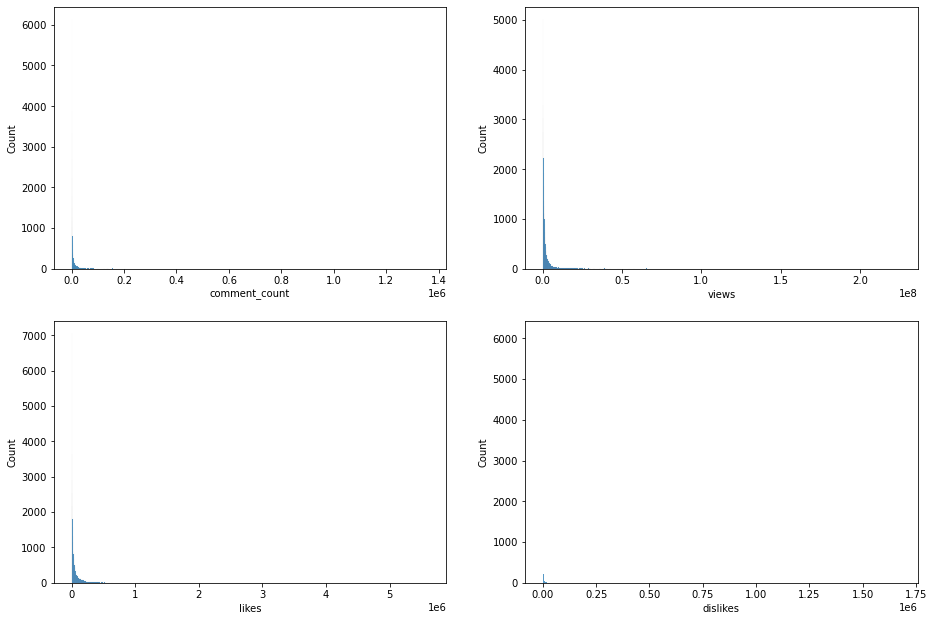

In [4]:
# simple hostogram

fig = plt.figure()
plt.subplots_adjust(left=2, bottom=2, right=4, top=4, wspace=None, hspace=None)

ax1 = fig.add_subplot(2, 2, 1)
sns.histplot(usa.comment_count)

ax2 = fig.add_subplot(2, 2, 2)
sns.histplot(usa.views)

ax3 = fig.add_subplot(2, 2, 3)
sns.histplot(usa.likes)

ax4 = fig.add_subplot(2, 2, 4)
sns.histplot(usa.dislikes)

A simple histogram is difficult to interpret because there is a long tail at the upper end of the distribution. 

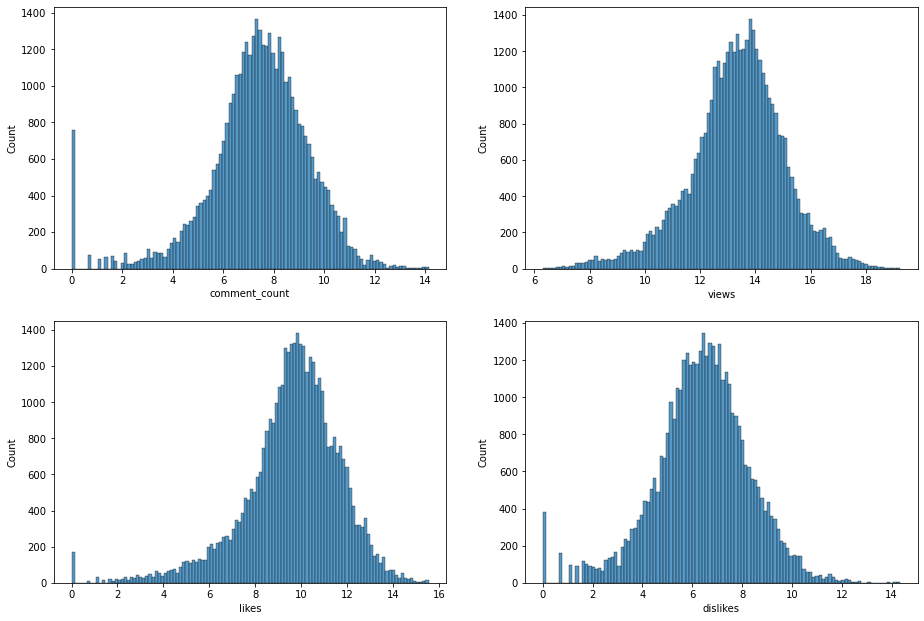

In [5]:
fig = plt.figure()
plt.subplots_adjust(left=2, bottom=2, right=4, top=4, wspace=None, hspace=None)

ax1 = fig.add_subplot(2, 2, 1)
sns.histplot(np.log(usa.comment_count + 1))

ax2 = fig.add_subplot(2, 2, 2)
sns.histplot(np.log(usa.views + 1))

ax3 = fig.add_subplot(2, 2, 3)
sns.histplot(np.log(usa.likes + 1))

ax4 = fig.add_subplot(2, 2, 4)
sns.histplot(np.log(usa.dislikes + 1))

With a log transformation, the distributions look more like a normal distribution.

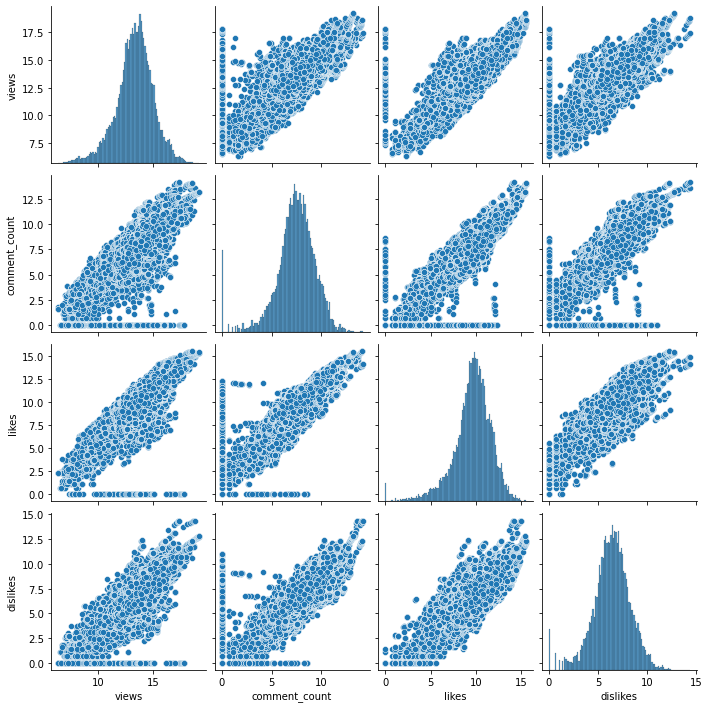

In [6]:
sns.pairplot(np.log(usa[['views', 'comment_count', 'likes', 'dislikes']] + 1))

Views, comments, likes, and dislikes are all proportionate. It seems that the more views the more audience interaction. The expectations for this can be seen along both the x and y axes of a few of the graphs. This indicates that comments or voting is likely disabled, breaking the otherwise strong correlation. 

In [7]:
can = pd.read_csv('./archive/CAvideos.csv')
gb = pd.read_csv('./archive/GBvideos.csv')
ger = pd.read_csv('./archive/DEvideos.csv')
fr = pd.read_csv('./archive/FRvideos.csv')

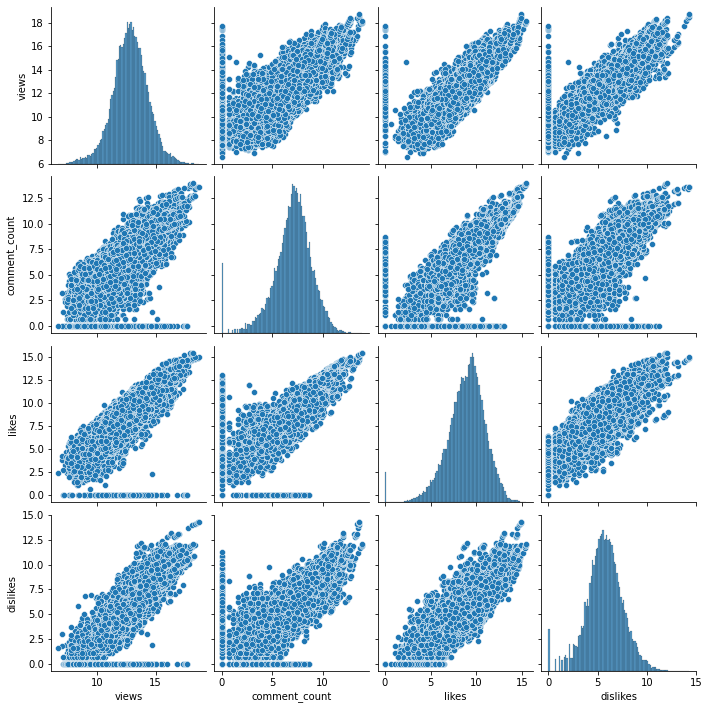

In [8]:
sns.pairplot(np.log(can[['views', 'comment_count', 'likes', 'dislikes']] + 1))

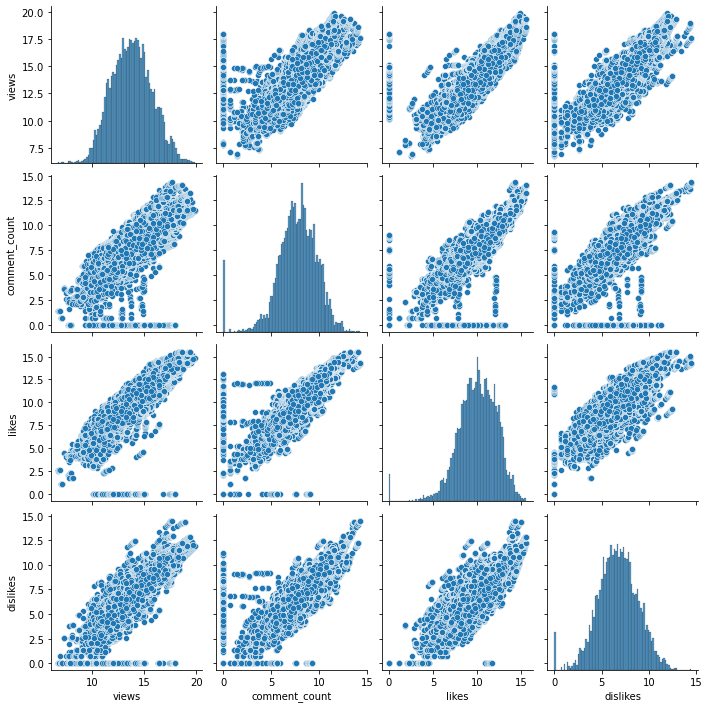

In [9]:
sns.pairplot(np.log(gb[['views', 'comment_count', 'likes', 'dislikes']] + 1))

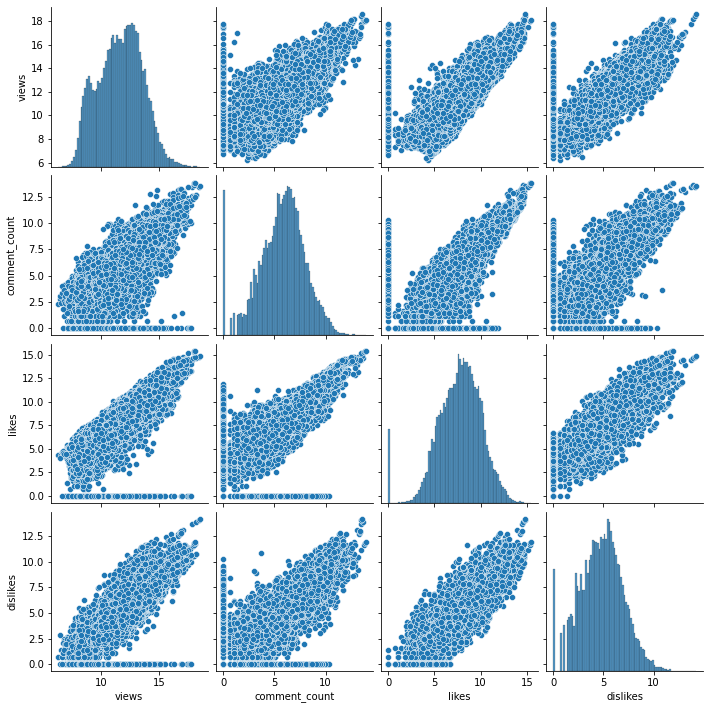

In [10]:
sns.pairplot(np.log(ger[['views', 'comment_count', 'likes', 'dislikes']] + 1))

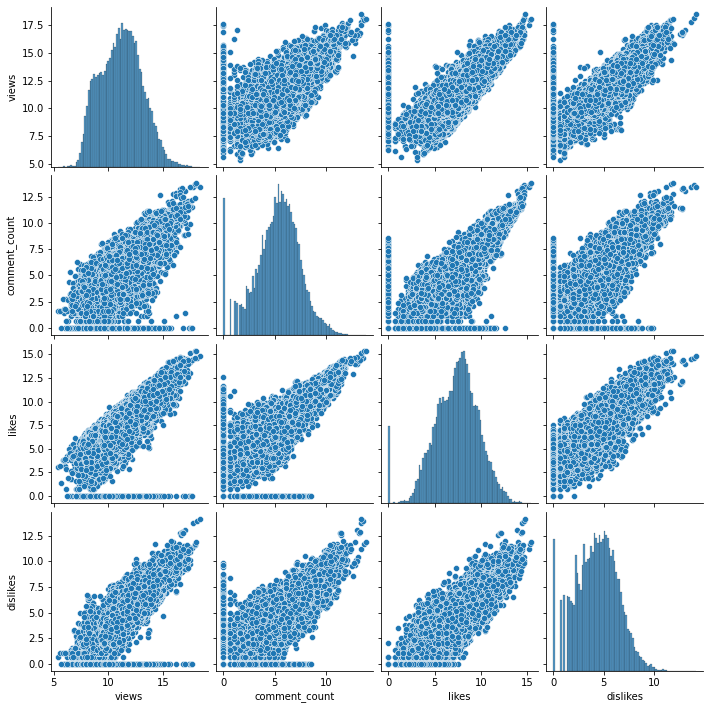

In [11]:
sns.pairplot(np.log(fr[['views', 'comment_count', 'likes', 'dislikes']] + 1))

For the other four countries, the same phenomenon exists for the most part. Great Britain is the only country with an interesting break from this correlation. Comments seem to have some step-wise cutoffs which skew the results as if comments are turned off after a certain view count. 

### <span style="color:magenta"> Q2. For 10 Points: Create a heatmap of correlations between the variables for a region of your choice </span>

>A [heat map (or heatmap)](https://en.wikipedia.org/wiki/Heat_map) is a graphical representation of data where the individual values contained in a matrix are represented as colors.

Seaborn makes it easy to create a heatmap with [`seaborn.heatmap()`](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

* Create a correlation matrix for your numeric variables using Pandas with [`DataFrame.corr()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html). That is, if your dataframe is called `df`, use `df.corr()`.
* Pass in your correlation matrix to `seaborn.heatmap()`, and annotate it with the parameter `annot=True`.
* Are there any interesting correlations? What are they?

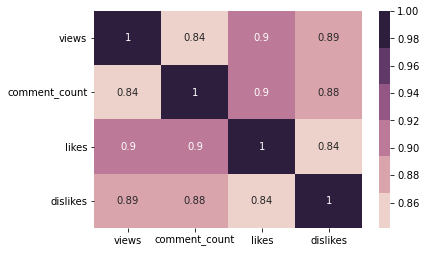

In [12]:
# put your code here
subset = gb[['views', 'comment_count', 'likes', 'dislikes']]
log_gb = np.log(subset)
corr = log_gb.corr()
sns.heatmap(corr,annot=True,cmap=sns.cubehelix_palette())

Views, comments, likes, and dislikes are all highly correlated, specifically likes/view, like/comments. surprisingly, likes and dislikes have the lowest correlation among these variables, though still high at 0.84.

In [13]:
gb.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...
1,3s1rvMFUweQ,17.14.11,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs …Ready for...
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13T01:45:13.000Z,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...


### <span style="color:magenta"> Q3. For 15 points: Create and compare OLS models using variables of your choice, for a region of your choice </span>
* Use statsmodels to perform an ANOVA (categorical regression) of a variable of your choice as the dependent variable (for example, views) and the video category as the independent variable. 
* Provide your interpretation of the results. 
* Create two different regression models where the dependent variables are the same, and the independent variables are different. What does your interpretation say about the two models?

In [43]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

model = smf.ols('comment_count ~ category_id', data=gb).fit()
table = sm.stats.anova_lm(model, typ=2)

# print(model.summary())
table

,sum_sq,df,F,PR(>F)
category_id,3.433973e+11,1.0,134.222061,5.492820e-31
Residual,9.955862e+13,38914.0,NaN,NaN


The category of a video affects the comment count in Great Britain. Because the p-value above is tiny, that there is an extremely low likelihood that the observations in this dataset would happen by 'accident' if there was no difference in the comment count between categories...at least in Great Britain. 

In [45]:
gb['ratings_disabled_num'] = gb['ratings_disabled'].astype(int)

model = smf.ols('ratings_disabled_num ~ comment_count', data=gb).fit()
print(model.summary())

                             OLS Regression Results                             
Dep. Variable:     ratings_disabled_num   R-squared:                       0.000
Model:                              OLS   Adj. R-squared:                  0.000
Method:                   Least Squares   F-statistic:                     17.27
Date:                  Thu, 04 Mar 2021   Prob (F-statistic):           3.26e-05
Time:                          10:11:00   Log-Likelihood:                 41503.
No. Observations:                 38916   AIC:                        -8.300e+04
Df Residuals:                     38914   BIC:                        -8.298e+04
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0074  

In [46]:
from scipy.stats import ttest_ind

good = gb[gb["comments_disabled"] == False]
bad = gb[gb["comments_disabled"] == True]

ttest_ind(good["comment_count"], bad["comment_count"])

Ttest_indResult(statistic=6.814987776469028, pvalue=9.564272240301036e-12)

For my first regression, I chose to measure how the comment count varies when the ratings are disabled. Since the ratings can be disabled or enabled, this is a categorical variable and required an ANOVA. The low p-value from the ANOVA indicates that The effect of ratings being disabled does affect the comment count. This seems reasonable given that viewers may fall susceptible to groupthink after seeing the ratings. 

For my second regression, I chose to measure how the comment count varies when comments have been disabled. I chose a t-test for this analysis and found that the model is statistically significant, implying that comments likely vary when comments are disabled.

## Part 2: Answer the questions below based on the *[Pokémon dataset](https://www.kaggle.com/abcsds/pokemon)* </span>
- Write Python code that can answer the following questions, and
- Explain your answers in plain English. 

### <span style="color:magenta"> Q4. For 10 Points: Plot the pairs of different ability points (HP, Attack, Sp. Attack, Defense, etc.). </span>

* Which pairs have the most/least correlation coefficients?

In [47]:
pokemon = pd.read_csv('./Pokemon.csv')
pokemon.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


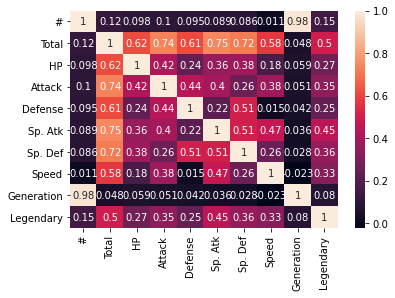

In [50]:
import seaborn as sns
pokemon[[]].corr()
sns.heatmap(pokemon.corr(),annot=True)

Unsurprisingly, the total column is highly correlated with the other stat columns because it is a sum of them. 
This is not too interesting. Another obvious correlation is between the legendary pokemon and total stat points. 
Again, this is expected given that legendary pokemon are characteristically powerful. 

Among the individual stats, defense and special defense as well as special defense and special attack have a correlation above 0.5.

### <span style="color:magenta"> Q5. For 15 Points: Plot the distribution of ability points per Pokémon type </span>

* How would you describe each Pokémon type with different ability points?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 <a list of 18 Text major ticklabel objects>)

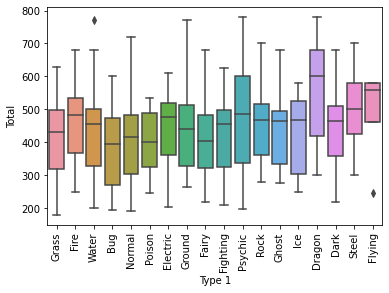

In [52]:
ax = sns.boxplot(x="Type 1", y="Total",data=pokemon)
ax = plt.gca()
plt.xticks(rotation = 90)

For this analysis, I limited the pokemon type to its Type 1. Although the Type 2 column may be informative, Kaggle explains that not all Pokemon have a Type 2. 

Among these types, there are some clear trends. Dragons and Flying Pokemon average almost 100 more HP than other types. Dragons in particular stick out because of their seemingly high interquartile range (IQR). Flying Pokemon is also interesting because of its lack of bar whiskers and high, lower-end of its IQR. It seems likely that there are only a few Pokemon that are Type 1 flying Pokemon. 

Bug Pokemon have the lowest mean, followed closely by Poison and Fairy Pokemon. Poison Pokemon in particular have a narrow IQR, meaning that it is a relatively homogenous group of weaker Pokemon. To the eye, it seems that the weakest Pokemon is a Grass Pokemon.

Psychic Pokemon also stick out because of their range. Both their full range and IQR are long, making this the most heterogeneous Pokemon Type with respect to Type. 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 <a list of 18 Text major ticklabel objects>)

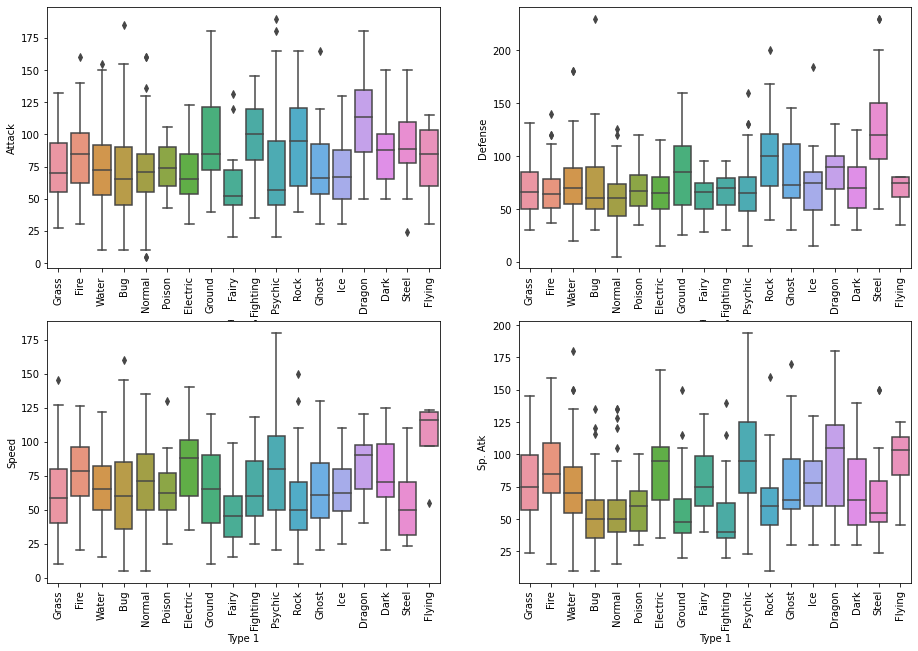

In [60]:
fig = plt.figure()
plt.subplots_adjust(left=2, bottom=2, right=4, top=4, wspace=None, hspace=None)

ax1 = fig.add_subplot(2, 2, 1)
ax = sns.boxplot(x="Type 1", y="Attack",data=pokemon)
ax = plt.gca()
plt.xticks(rotation = 90)
ax2 = fig.add_subplot(2, 2, 2)
ax = sns.boxplot(x="Type 1", y="Defense",data=pokemon)
ax = plt.gca()
plt.xticks(rotation = 90)
ax1 = fig.add_subplot(2, 2, 3)
ax = sns.boxplot(x="Type 1", y="Speed",data=pokemon)
ax = plt.gca()
plt.xticks(rotation = 90)
ax2 = fig.add_subplot(2, 2, 4)
ax = sns.boxplot(x="Type 1", y="Sp. Atk",data=pokemon)
ax = plt.gca()
plt.xticks(rotation = 90)

I also took a look at the individual ability points by group. 

Building on my comments from the Total HP, we can see that Dragons have the strongest attacks and Fairy have the weakest. 
Steel Pokemon (unsurprisingly) have the best Defense, but they did not stick out previously because thier almost universally have tradeoff with other abilities. 

Flying Pokemon are definitively faster, which is why they generally have better HP.  

Bug Pokemon, though not overwhelmingly low in any ability are consistently low in all. 

Psychic Pokemon again stick out because of their range in 3 of the 4 categories. Only their defense is a 'normal' range relative to other Pokemon.

### <span style="color:magenta"> Q6. For 15 Points: Explore how the Pokémon in each generation differ from each other? </span>

* Do you think designers of *Pokémon* tried to address different distributions of ability points in each generation?

In [62]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

subset = pokemon[['Total', 'Generation']]

results = pairwise_tukeyhsd(subset['Total'], subset['Generation'])
results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,-8.5302,0.9,-51.0648,34.0044,False
1,3,9.4117,0.9,-28.49,47.3135,False
1,4,32.2033,0.2165,-8.6907,73.0972,False
1,5,8.1746,0.9,-29.4336,45.7828,False
1,6,9.5648,0.9,-36.6126,55.7422,False
2,3,17.942,0.8178,-24.9023,60.7862,False
2,4,40.7335,0.1095,-4.7791,86.2462,False
2,5,16.7049,0.8615,-25.8799,59.2897,False
2,6,18.095,0.9,-32.2184,68.4084,False
3,4,22.7915,0.5968,-18.4244,64.0075,False


To compare each group, I've used Tukey's Honestly Significant Differences Analysis from the Statsmodels library. This analysis shows that there are no significant differences between the generations in terms of Total HP. Each generation pair has a p-value of greater than 0.05, implying that we should not conclude that there are significant differences between generations. 

From this, I think that we can conclude that designers of each subsequent generation likely endeavored to keep new generations on par with those of the previous generations.